In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import math 
import astropy
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.stats as sps

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [2]:
#SciServer Modules
import SciServer
from SciServer import CasJobs

In [3]:
AGNIDs_DF = pd.read_excel('Massive_SF_ID.xlsx')
AGNIDs = pd.DataFrame(AGNIDs_DF)
AGNIDs = AGNIDs.values.tolist()

AGNID = []

for i in range(len(AGNIDs)):
    AGNID.append(AGNIDs[i])
    
print('Target number of AGN Galaxies: ' + str(len(AGNID)) + '\n')
print('MaNGA IDs: ' + str(AGNID))

Target number of AGN Galaxies: 1466

MaNGA IDs: [['1-351890'], ['1-245268'], ['1-625977'], ['1-195737'], ['1-325495'], ['1-35371'], ['1-35716'], ['1-2456'], ['1-401748'], ['1-32701'], ['1-120074'], ['1-113346'], ['1-113273'], ['1-42340'], ['1-44083'], ['1-321148'], ['1-245560'], ['1-25690'], ['1-122206'], ['1-319368'], ['1-319368'], ['1-82991'], ['1-394046'], ['1-420973'], ['1-180513'], ['1-36476'], ['1-231412'], ['1-78358'], ['1-52936'], ['1-95220'], ['1-27443'], ['1-118005'], ['1-118202'], ['1-2988'], ['1-97179'], ['1-596366'], ['1-212420'], ['1-338963'], ['1-300739'], ['1-522187'], ['1-458664'], ['1-1009'], ['1-211790'], ['1-35709'], ['1-35729'], ['1-386400'], ['1-210415'], ['1-178265'], ['1-41257'], ['1-582721'], ['1-122708'], ['1-383'], ['1-319381'], ['1-605788'], ['1-80655'], ['1-395813'], ['1-109679'], ['1-180135'], ['1-550950'], ['1-113587'], ['1-73002'], ['1-217695'], ['1-217650'], ['1-591528'], ['1-603920'], ['1-217331'], ['1-590053'], ['1-605884'], ['1-278490'], ['1-95770'],

In [4]:
Properties = """select drp.MaNGAid,
                drp.z,
                drp.nsa_elpetro_mass as GalMass,
                dap.ha_gsigma_1re as Ha_VelDisp,
                dap.nsa_sersic_th50 as Distance,
                
                dap.daptype from mangaDRPall as drp
                JOIN mangaDAPall as dap on dap.mangaid = drp.mangaid
                WHERE (drp.z < 0.15) and (drp.z > 0.001)
                and dap.daptype = 'HYB10-MILESHC-MASTARHC2'
                and (drp.nsa_elpetro_mass > 5e+9)"""

Selection1 = CasJobs.executeQuery(Properties, 'dr17')
print(Selection1)

MaNGAIDs_raw = Selection1['MaNGAid']
GalMass_raw = Selection1['GalMass']
Radius_raw = Selection1['Distance']
Ha_VelDisp_raw = Selection1['Ha_VelDisp']

       MaNGAid         z       GalMass  Ha_VelDisp   Distance  \
0      1-55648  0.046209  9.439710e+09    49.14605   8.091390   
1      1-48201  0.025391  1.136590e+10   431.74740   4.720030   
2      1-48111  0.039419  5.164150e+09   210.06860   0.887253   
3      1-48136  0.025606  7.120350e+09    39.99686   4.301190   
4      1-48223  0.030781  1.717490e+10    44.19834   5.469280   
...        ...       ...           ...         ...        ...   
7191  1-197454  0.082137  6.072710e+10   163.34610   7.653750   
7192  1-197121  0.075090  2.395090e+10    39.53113   2.885310   
7193  1-568564  0.055466  1.796530e+10    54.77365   6.270550   
7194  1-456996  0.020318  1.306880e+10    57.95288  11.475700   
7195  1-294332  0.022978  1.176100e+10    60.72428   6.849950   

                      daptype  
0     HYB10-MILESHC-MASTARHC2  
1     HYB10-MILESHC-MASTARHC2  
2     HYB10-MILESHC-MASTARHC2  
3     HYB10-MILESHC-MASTARHC2  
4     HYB10-MILESHC-MASTARHC2  
...                       .

In [5]:
MaNGAIDs = []
GalMass = []
Radius = []

Ha_VelDisp = []

for i in range(len(MaNGAIDs_raw)):
    MaNGAIDs.append([MaNGAIDs_raw[i]])

for i in range(len(GalMass_raw)):
    GalMass.append([GalMass_raw[i]])
    
for i in range(len(Radius_raw)):
    Radius.append([Radius_raw[i]])
    
for i in range(len(Ha_VelDisp_raw)):
    Ha_VelDisp.append([Ha_VelDisp_raw[i]])
    
print('No. of MaNGA IDs: ' + str(len(MaNGAIDs)))
print('No. of Galaxy Mass Values: ' + str(len(GalMass)))
print('No. of Radius Values: ' + str(len(Radius)))
print('No. of Ha Velocity Dispersion Values: ' + str(len(Ha_VelDisp)))

No. of MaNGA IDs: 7196
No. of Galaxy Mass Values: 7196
No. of Radius Values: 7196
No. of Ha Velocity Dispersion Values: 7196


In [6]:
GalIDs_fin = []
GalMass_fin = []
Radius_fin = []

Ha_VelDisp_fin = []

for i in range(len(AGNID)):
    for x in range(len(MaNGAIDs)):
        if (AGNID[i] == MaNGAIDs[x]):
            GalIDs_fin.append(MaNGAIDs[x])
            GalMass_fin.append(GalMass[x])
            Radius_fin.append(Radius[x])
            Ha_VelDisp_fin.append(Ha_VelDisp[x])
            break

print('Galaxies: ' + str(len(GalIDs_fin)))
print('Galaxy Mass Values: ' + str(len(GalMass_fin)))
print('Radius Values: ' + str(len(Radius_fin)) + '\n')
print('Ha Velocity Dispersion Values: ' + str(len(Ha_VelDisp_fin)))

Galaxies: 1466
Galaxy Mass Values: 1466
Radius Values: 1466

Ha Velocity Dispersion Values: 1466


In [7]:
#Removing brackets from each element
for i in range(len(Ha_VelDisp_fin)):
    Ha_VelDisp_fin[i] = str(Ha_VelDisp_fin[i])[1:]
    Ha_VelDisp_fin[i] = str(Ha_VelDisp_fin[i])[:-1]
    
for i in range(len(Radius_fin)):
    Radius_fin[i] = str(Radius_fin[i])[1:]
    Radius_fin[i] = str(Radius_fin[i])[:-1]

In [8]:
#Merging values into a 2D array to select points graphed
PltPts2D = np.array(list(zip(Ha_VelDisp_fin, Radius_fin)))

print('Length: ' + str(len(PltPts2D)) + '\n')
PltPts2D = pd.DataFrame(PltPts2D)

PltPts2D

Length: 1466



,0,1
0,72.60837,7.12182
1,60.2545,2.749403
2,58.45543,6.545248
3,56.21394,5.382347
4,54.4311,159.7578
...,...,...
1461,192.261,14.27
1462,108.0577,2.63107
1463,413.2172,13.0822
1464,83.0787,5.00197


In [9]:
for i in range(1466):
    PltPts2D[0][i] = float(PltPts2D[0][i])
    PltPts2D[1][i] = float(PltPts2D[1][i])
    
print(PltPts2D)

            0        1
0     72.6084  7.12182
1     60.2545   2.7494
2     58.4554  6.54525
3     56.2139  5.38235
4     54.4311  159.758
...       ...      ...
1461  192.261    14.27
1462  108.058  2.63107
1463  413.217  13.0822
1464  83.0787  5.00197
1465  55.2734  17.2391

[1466 rows x 2 columns]


In [19]:
#Omitting values less than zero
PltPts2D_Ha =[]
PltPts2D_Rad =[]

for i in range(len(PltPts2D)):
    if((0 < PltPts2D[0][i] < 600) and (0 < PltPts2D[1][i] < 25)):
        PltPts2D_Ha.append(PltPts2D[0][i])
        PltPts2D_Rad.append(PltPts2D[1][i])
        
PltPts2D_z = np.array(list(zip(PltPts2D_Ha, PltPts2D_Rad)))

print('2D Plot Point Array Length: ' + str(len(PltPts2D_z)) + '\n')
print(min(PltPts2D_Rad))
print(max(PltPts2D_Rad))
print(PltPts2D_z)

2D Plot Point Array Length: 1403

0.31999
24.7853
[[ 72.60837    7.12182 ]
 [ 60.2545     2.749403]
 [ 58.45543    6.545248]
 ...
 [413.2172    13.0822  ]
 [ 83.0787     5.00197 ]
 [ 55.27339   17.2391  ]]


In [15]:
#Finding min and max Ha values
#MinHa = min(PltPts2D_Ha)
#MaxHa = max(PltPts2D_Ha)

#print('Minimum: ' + str(MinHa))
#print('Maximum: ' + str(MaxHa))

In [16]:
#Filtering based on IQR
#OutliersX = []
#OutliersY = []
#PltPtsIQR_Ha =[]
#PltPtsIQR_Rad =[]

#for i in range(len(PltPts2D_z)):
    #if(((abs(PltPts2D_z[i][0]) - MinHa) < RNG) or ((abs(PltPts2D_z[i][1]) - MaxHa) > RNG)):
        #OutliersX.append(PltPts2D_z[i][0])
        #OutliersY.append(PltPts2D_z[i][1])
    #else:
        #PltPtsIQR_Ha.append(PltPts2D_z[i][0])
        #PltPtsIQR_Rad.append(PltPts2D_z[i][1])
        
#PltPts2D_fin = np.array(list(zip(PltPtsIQR_Ha, PltPtsIQR_Rad)))

#print('2D Plot Point Array Length: ' + str(len(PltPts2D_fin)) + '\n')
#print(PltPts2D_fin)

In [20]:
#Splitting elements back into two lists for plotting
Ha_VelDisp_plt = []
GalMass_plt = []

for i in range(len(PltPts2D_z)):
    Ha_VelDisp_plt.append([PltPts2D_z[i][0]])
    GalMass_plt.append([PltPts2D_z[i][1]])
    
print('Ha Velocity Dispersion Values: ' + str(len(Ha_VelDisp_plt)))
print('Radius Values: ' + str(len(GalMass_plt)))

print(Ha_VelDisp_plt)
print(GalMass_plt)

Ha Velocity Dispersion Values: 1403
Radius Values: 1403
[[72.60837], [60.2545], [58.45543], [56.21394], [75.1436], [79.77238], [51.3535], [32.43536], [486.5799], [343.4518], [289.8645], [476.3001], [28.05242], [26.26365], [360.6222], [33.04232], [55.61409], [27.10254], [27.10254], [35.63959], [78.33716], [136.7605], [48.59771], [250.129], [33.51571], [25.62655], [82.75689], [60.19493], [56.42288], [53.95195], [45.54477], [43.61842], [116.6421], [27.37999], [51.08187], [556.2342], [42.96598], [70.96873], [95.9624], [35.90437], [36.99185], [212.0538], [47.47561], [23.59984], [35.11226], [75.28221], [61.12512], [294.0002], [38.04571], [48.85083], [68.72342], [22.88394], [30.64913], [28.15125], [30.41985], [35.3105], [57.67529], [50.98343], [229.8877], [41.96062], [76.98264], [42.21815], [28.32902], [30.14007], [32.41029], [38.51054], [53.62622], [54.00654], [49.1034], [129.2405], [68.26833], [30.23654], [38.54842], [63.21071], [30.58077], [52.00677], [70.6956], [100.2114], [31.10525], [46

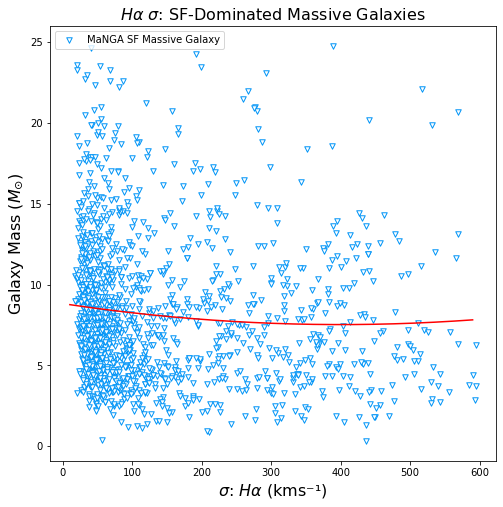

In [23]:
plt.figure(figsize = (8, 8))
plt.title('$H{\u03B1}$ ${\u03C3}$: SF-Dominated Massive Galaxies', fontsize = 16)

plt.scatter(Ha_VelDisp_plt, 
            GalMass_plt, 
            color = 'white', 
            edgecolor = '#0295f7', 
            marker = 'v', 
            alpha = 1, 
            s = 30, 
            label = "MaNGA SF Massive Galaxy")

plt.xlabel('${\u03C3}$: $H{\u03B1}$ (kms\u207B\u00B9)', fontsize = 16)
plt.ylabel('Galaxy Mass ($M_{\odot}$)', fontsize = 16)
#plt.xlim(8, 70)
#plt.ylim(0, 25)

#Regression Line
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(Ha_VelDisp_plt)

Reg = LinearRegression()
Reg.fit(X_poly, GalMass_plt)

XValues_lin = np.linspace(10, 590, 1403).reshape(-1, 1)
XValues_poly = poly_features.transform(XValues_lin)

YValues = Reg.predict(XValues_poly)

plt.plot(XValues_lin, YValues, c ='red')
legend = plt.legend(loc = 'upper left')
plt.savefig('Ha Velocity Dispersion: Massive SF', dpi = 600, bbox_inches = 'tight')
plt.show()

In [18]:
#Calculating p-value
mod = sm.OLS(GalMass_plt, Ha_VelDisp_plt)
fii = mod.fit()
p_value = fii.summary2().tables[1]['P>|t|']

print(p_value)
#p < .0001

x1    4.191026e-155
Name: P>|t|, dtype: float64


In [25]:
#Calculating r-value
r2 = r2_score(GalMass_plt, YValues)
r = -1 * (np.sqrt(abs(r2)))
print('r = ' + str(r))

r = -0.14285124400235286
